In [2]:
import os

import gymnasium as gym
import matplotlib.pyplot as plt

from stable_baselines3 import PPO
from stable_baselines3.common import results_plotter
from stable_baselines3.common.monitor import Monitor
from stable_baselines3.common.atari_wrappers import AtariWrapper
from stable_baselines3.common.results_plotter import plot_results
from stable_baselines3.common.evaluation import evaluate_policy

from spaceinvadersrl.video import ModelVideoRecorder
from spaceinvadersrl.cnn_lstm_policy import CnnLstmPolicy
from spaceinvadersrl.checkpoint import SaveOnBestTrainingRewardCallback

In [2]:
log_dir = "../assets/models/ppo/"
os.makedirs(log_dir, exist_ok=True)

In [4]:
env_id = 'SpaceInvadersNoFrameskip-v4'
env = gym.make(env_id, render_mode="rgb_array")
env = AtariWrapper(env)
env = Monitor(env, log_dir)

A.L.E: Arcade Learning Environment (version 0.8.1+53f58b7)
[Powered by Stella]


In [4]:
ppo_model = PPO(
    CnnLstmPolicy,
    env,
    learning_rate=3e-4,
    batch_size=64,
    n_steps=512,
    gamma=0.99,
    gae_lambda=0.95,
    clip_range=0.1,
    ent_coef=0.0,
    vf_coef=0.5,
    max_grad_norm=0.5,
    policy_kwargs=dict(net_arch=[512]),
    verbose=0
)

In [5]:
callback = SaveOnBestTrainingRewardCallback(check_freq=10000, log_dir=log_dir, verbose=0)

In [6]:
timesteps = 1e6
ppo_model.learn(total_timesteps=int(timesteps), callback=callback, progress_bar=True)

Output()

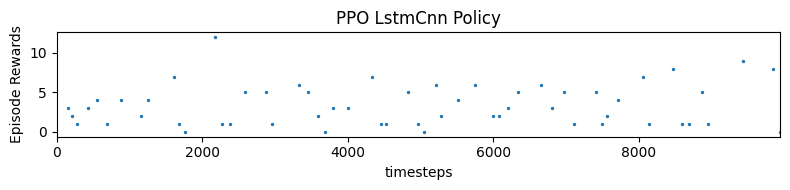

In [ ]:
plot_results([log_dir], timesteps, results_plotter.X_TIMESTEPS, "PPO LstmCnn Policy")
plt.show()

In [10]:
from stable_baselines3 import PPO

best_model = PPO.load(f"{log_dir}/best_model.zip", env)

#mean_reward, std_reward = evaluate_policy(ppo_model, ppo_model.get_env(), n_eval_episodes=25)
mean_reward, std_reward = evaluate_policy(best_model, best_model.get_env(), n_eval_episodes=20)
print(f"Mean Reward: {mean_reward}\nReward Standard Deviation: {std_reward}")

Mean Reward: 4.95
Reward Standard Deviation: 3.4128433893163046


In [11]:
#recorder = ModelVideoRecorder(ppo_model, video_folder="../assets/gifs/", video_length=4000, env_id=env_id, model_type="PPO")
recorder = ModelVideoRecorder(best_model, video_folder="../assets/gifs/", video_length=3000, env_id=env_id, model_type="PPO")

In [12]:
recorder.record_gif()